In [1]:
#Bob has started his own mobile company. 
#He wants to give tough fight to big companies like Apple, Samsung etc. 
#He does not know how to estimate price of mobiles his company creates.
#In this competitive mobile phone market, you cannot simply assume things.
#To solve this problem, he collects sales data of mobile phones of various companies.
#Bob wants to find out some relation between features of a mobile phone (eg:- RAM, Internal Memory etc) and its selling price. 
#But he is not so good at Machine Learning.
#Create an artificial neural network-based classifier to help Bob.
#Data and class labels are available in mobile_price_classification.csv file. 
#Use price_range column as label and remaining columns as data.


In [2]:
#import libraries
import numpy as np
import pandas as pd


In [3]:
#load dataset
df=pd.read_csv("mobile_price_classification.csv")

In [4]:
#display first five rows
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [5]:
#display column names
df.columns.values

array(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim',
       'front_cam', '4G', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores',
       'primary_camera', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w',
       'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'],
      dtype=object)

In [6]:
#display values in price range
df['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

In [7]:
#find number  of rows and columns
df.shape

(2000, 21)

In [8]:
#check the datatype and check any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [9]:
#here no null values
#no categorical values

In [10]:
df.isnull().sum()

battery_power     0
bluetooth         0
clock_speed       0
dual_sim          0
front_cam         0
4G                0
int_memory        0
m_dep             0
mobile_wt         0
n_cores           0
primary_camera    0
px_height         0
px_width          0
ram               0
sc_h              0
sc_w              0
talk_time         0
three_g           0
touch_screen      0
wifi              0
price_range       0
dtype: int64

In [11]:
#no missing values

In [12]:
data = df.drop('price_range',axis=1)

In [13]:
data.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,primary_camera,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [14]:
label=df.price_range

In [15]:
label.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [16]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data=scaler.fit_transform(data)

In [17]:
data

array([[-0.90259726, -0.9900495 ,  0.83077942, ..., -1.78686097,
        -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       [-1.5376865 ,  1.0100505 , -1.2530642 , ...,  0.55964063,
         0.99401789, -1.01409939],
       ...,
       [ 1.53077336, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789, -1.01409939],
       [ 0.62252745, -0.9900495 , -0.76274805, ...,  0.55964063,
         0.99401789,  0.98609664],
       [-1.65833069,  1.0100505 ,  0.58562134, ...,  0.55964063,
         0.99401789,  0.98609664]])

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.30, random_state=42)

In [19]:
X_train.shape

(1400, 20)

In [20]:
y_train.shape

(1400,)

In [21]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [22]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [23]:
from keras.models import Sequential
from keras.layers import Dense

In [24]:
#create sequencial model
model = Sequential()

In [25]:
#use activation functions relu and sigmoid
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [26]:
#
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [27]:
#teach machine around 100 times.so epochs=100
history = model.fit(X_train, y_train, epochs=200)

Epoch 1/200
44/44 [==============================] - 1s 2ms/step - loss: 0.6197 - accuracy: 0.2807
Epoch 2/200
44/44 [==============================] - 0s 1ms/step - loss: 0.0856 - accuracy: 0.3036
Epoch 3/200
44/44 [==============================] - 0s 1ms/step - loss: -0.3961 - accuracy: 0.3186
Epoch 4/200
44/44 [==============================] - 0s 2ms/step - loss: -0.8474 - accuracy: 0.3279
Epoch 5/200
44/44 [==============================] - 0s 1ms/step - loss: -1.2861 - accuracy: 0.3264
Epoch 6/200
44/44 [==============================] - 0s 1ms/step - loss: -1.7371 - accuracy: 0.3236
Epoch 7/200
44/44 [==============================] - 0s 1ms/step - loss: -2.2128 - accuracy: 0.3150
Epoch 8/200
44/44 [==============================] - 0s 2ms/step - loss: -2.7272 - accuracy: 0.3107
Epoch 9/200
44/44 [==============================] - 0s 2ms/step - loss: -3.2910 - accuracy: 0.3043
Epoch 10/200
44/44 [==============================] - 0s 2ms/step - loss: -3.9136 - accuracy: 0.3014
E

In [28]:
y_pred = model.predict(X_test)

19/19 [==============================] - 0s 1ms/step


In [29]:
y_pred

array([[0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [8.7211525e-01],
       [6.1907474e-04],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [4.0211137e-02],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.9287363e-06],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [9.9993199e-01],
       [1.0000000e+00],
       [1.0000000e+00],
       [4.6515255e-04],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.000000

In [30]:
y_pred[y_pred>0.5]=1
y_pred[y_pred<=0.5]=0

In [31]:
y_pred

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],

In [32]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.4116666666666667

KeyError: 'val_accuracy'

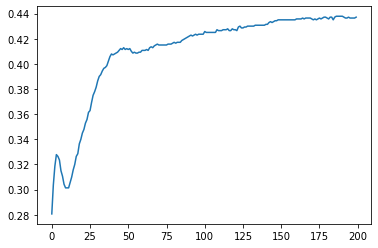

In [33]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

In [34]:
#create sequencial model
model = Sequential()
#use activation functions relu and sigmoid
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [35]:
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [36]:
history=model.fit(X_train,y_train,validation_split=0.2,epochs=200)

Epoch 1/200
35/35 [==============================] - 1s 8ms/step - loss: 2.3528 - accuracy: 0.2455 - val_loss: 2.1612 - val_accuracy: 0.2429
Epoch 2/200
35/35 [==============================] - 0s 2ms/step - loss: 2.1803 - accuracy: 0.2429 - val_loss: 2.0050 - val_accuracy: 0.2643
Epoch 3/200
35/35 [==============================] - 0s 2ms/step - loss: 2.0321 - accuracy: 0.2464 - val_loss: 1.8714 - val_accuracy: 0.2714
Epoch 4/200
35/35 [==============================] - 0s 2ms/step - loss: 1.9107 - accuracy: 0.2455 - val_loss: 1.7689 - val_accuracy: 0.2643
Epoch 5/200
35/35 [==============================] - 0s 2ms/step - loss: 1.8183 - accuracy: 0.2607 - val_loss: 1.6911 - val_accuracy: 0.2714
Epoch 6/200
35/35 [==============================] - 0s 2ms/step - loss: 1.7479 - accuracy: 0.2589 - val_loss: 1.6298 - val_accuracy: 0.2643
Epoch 7/200
35/35 [==============================] - 0s 2ms/step - loss: 1.6920 - accuracy: 0.2536 - val_loss: 1.5842 - val_accuracy: 0.2679
Epoch 8/200
3

In [37]:
y_pred = model.predict(X_test)

19/19 [==============================] - 0s 2ms/step


In [38]:
y_pred

array([[5.36920875e-03],
       [9.99978960e-01],
       [9.83257592e-01],
       [1.00000000e+00],
       [9.99867320e-01],
       [9.81091619e-01],
       [9.98620868e-01],
       [2.11617979e-03],
       [9.99999881e-01],
       [9.99688208e-01],
       [9.07318890e-02],
       [6.41774595e-01],
       [9.99993980e-01],
       [1.00000000e+00],
       [9.99999821e-01],
       [9.99999583e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.94797051e-01],
       [1.03226807e-02],
       [9.76805203e-03],
       [9.99382675e-01],
       [7.23537326e-01],
       [9.99999404e-01],
       [3.16124931e-02],
       [9.89801764e-01],
       [9.99999881e-01],
       [9.99999881e-01],
       [9.99894798e-01],
       [1.23188962e-04],
       [1.23885259e-01],
       [9.45459578e-06],
       [1.00000000e+00],
       [2.40995944e-03],
       [9.99355495e-01],
       [9.92446125e-01],
       [9.99971688e-01],
       [1.02776587e-01],
       [1.00000000e+00],
       [1.65735573e-01],


In [39]:
y_pred[y_pred>0.5]=1
y_pred[y_pred<=0.5]=0

In [40]:
y_pred

array([[0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.4633333333333333

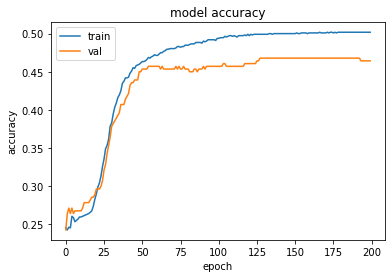

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

In [43]:
#create sequencial model
model = Sequential()
#use activation functions relu and sigmoid
model.add(Dense(10,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [44]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [45]:
history=model.fit(X_train,y_train,validation_split=0.2,epochs=200)

Epoch 1/200
35/35 [==============================] - 1s 7ms/step - loss: 0.0000e+00 - accuracy: 0.2402 - val_loss: 0.0000e+00 - val_accuracy: 0.2857
Epoch 2/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2616 - val_loss: 0.0000e+00 - val_accuracy: 0.2929
Epoch 3/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2723 - val_loss: 0.0000e+00 - val_accuracy: 0.3036
Epoch 4/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.2884 - val_loss: 0.0000e+00 - val_accuracy: 0.3143
Epoch 5/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3036 - val_loss: 0.0000e+00 - val_accuracy: 0.3214
Epoch 6/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3152 - val_loss: 0.0000e+00 - val_accuracy: 0.3214
Epoch 7/200
35/35 [==============================] - 0s 2ms/step - loss: 0.0000e+00 - accuracy: 0.3339 - v

In [46]:
y_pred = model.predict(X_test)

19/19 [==============================] - 0s 1ms/step


In [47]:
y_pred

array([[0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [1.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [1.000000

In [48]:
y_pred[y_pred>0.5]=1
y_pred[y_pred<=0.5]=0

In [49]:
y_pred

array([[0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.3516666666666667

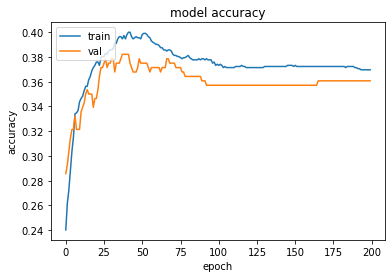

In [51]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','val'],loc='upper left')
plt.show()

In [ ]:
model.predict([[6.6,2.9,4.6,1.3]])

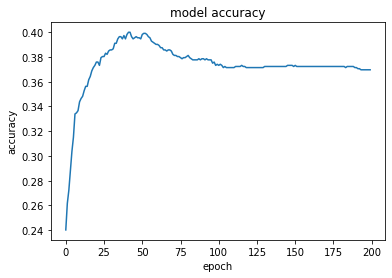

In [52]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

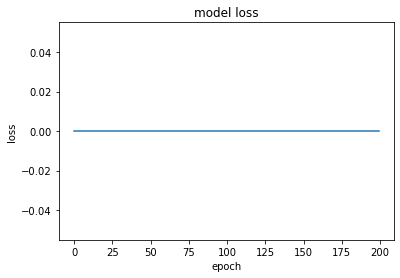

In [53]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
#cross validation

In [54]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [55]:
import sklearn
print(sklearn.__version__)

1.1.3


In [56]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [57]:
conda update scikit-learn

Solving environment: ...working... 

Updating scikit-learn is constricted by 

anaconda -> requires scikit-learn==1.0.2=py39hf11a4ad_1

If you are sure you want an update of your package either try `conda update --all` or install a specific version of the package you want using `conda install <pkg>=<version>`

done

# All requested packages already installed.

Retrieving notices: ...working... done

Note: you may need to restart the kernel to use updated packages.
